In [1]:
import pandas as pd
import duckdb as db
import seaborn as sns
import matplotlib.pyplot as plt

sns.set_theme(style="whitegrid")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# pd.set_option('plotting.backend', 'plotly')

In [29]:
df=pd.read_csv('../../data/raw/TRAIN.csv', parse_dates=['Date'])
df.head()

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52


In [30]:
# df['Region_Discount'] = df['Region_Code'].astype(str) + '_' + df['Discount'].astype(str)
# df['Region_Holiday'] = df['Region_Code'].astype(str) + '_' + df['Holiday'].astype(str)

In [35]:
df["Day_of_Week"] = df["Date"].dt.day_name()
df["Month"] = df["Date"].dt.month_name()
df["Year"] = df["Date"].dt.year
df["Quarter"] = df["Date"].dt.quarter
df["Week"] = df["Date"].dt.isocalendar().week
df["Is_Weekend"] = df["Day_of_Week"].apply(lambda x: 1 if x in ['Saturday', 'Sunday'] else 0)

In [36]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales,Day_of_Week,Month,Quarter,Week,Is_Weekend,Year
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84,Monday,January,1,1,0,2018
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12,Monday,January,1,1,0,2018
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20,Monday,January,1,1,0,2018
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16,Monday,January,1,1,0,2018
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52,Monday,January,1,1,0,2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00,Friday,May,2,22,0,2019
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64,Friday,May,2,22,0,2019
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56,Friday,May,2,22,0,2019
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41,Friday,May,2,22,0,2019


# Univariate Analysis

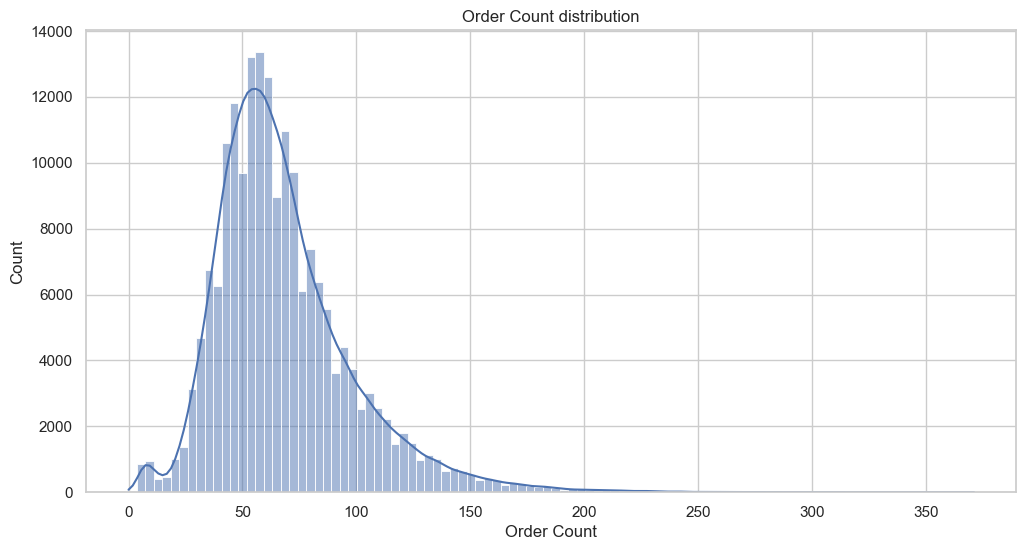

In [15]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Order', bins=100, kde=True);
plt.title('Order Count distribution');
plt.xlabel('Order Count');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>
- We can see that most of the order count for each store is around 50 - 80

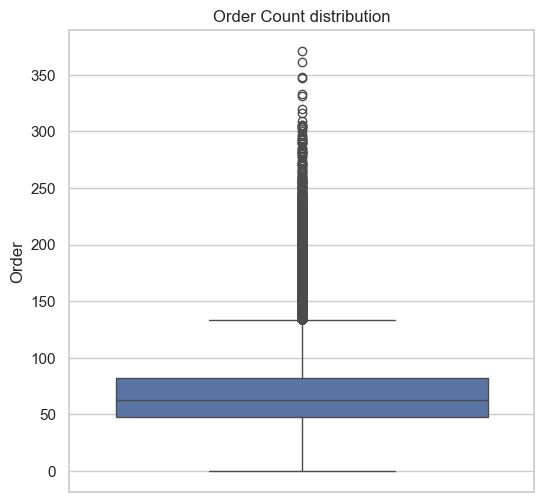

In [34]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='Order');
plt.title('Order Count distribution');

<b style='padding: 4px 10px 6px 10px;border-radius: 5px;background: #009688;color: #fff;display: inline-block;'>Observations</b>

- We can see that most of the order count for each store is around 50 - 80

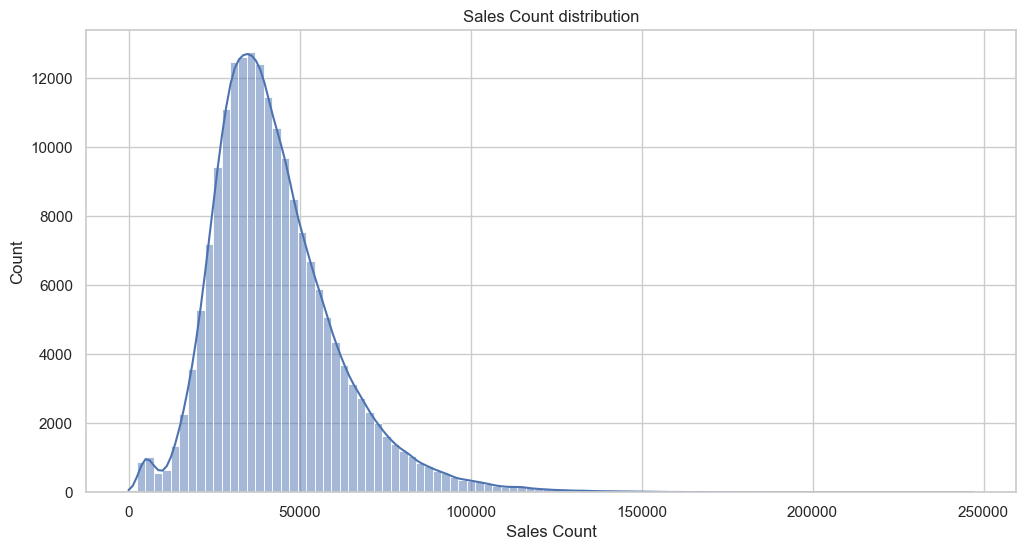

In [23]:
plt.figure(figsize=(12, 6))
sns.histplot(data=df, x='Sales', bins=100, kde=True);
plt.title('Sales Count distribution');
plt.xlabel('Sales Count');

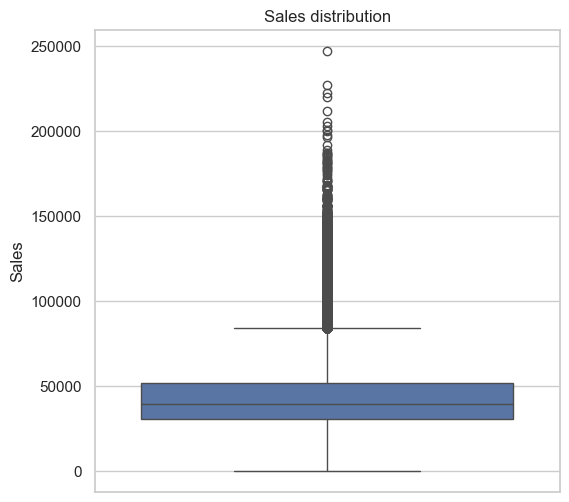

In [33]:
plt.figure(figsize=(6, 6))
sns.boxplot(data=df, y='Sales');
plt.title('Sales distribution');

# Bivariate Analysis

## Sales

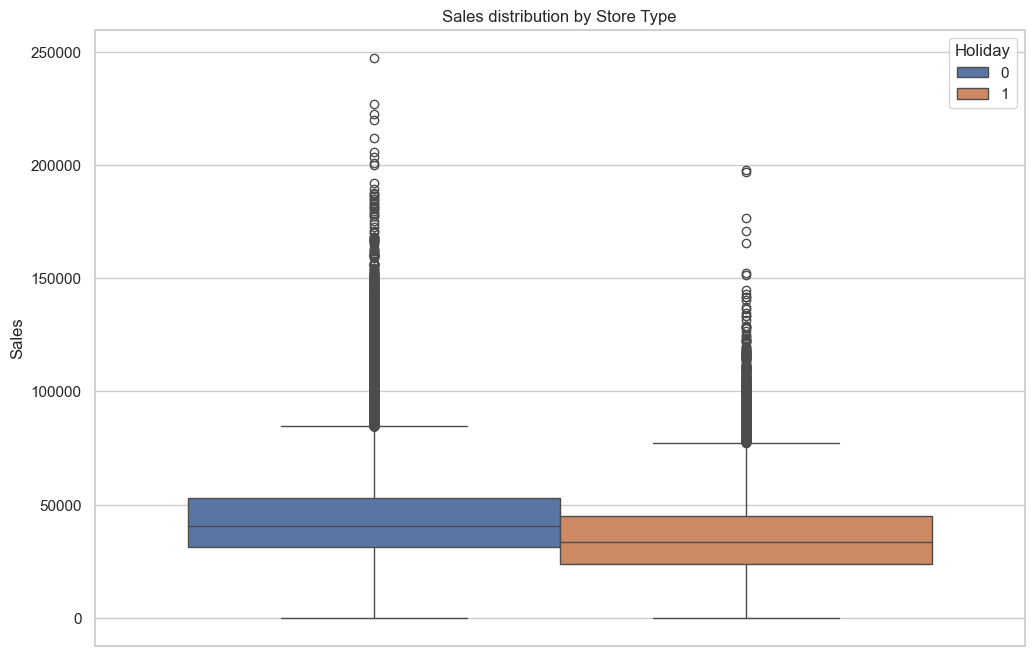

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Holiday');
plt.title('Sales distribution by Holiday Type');

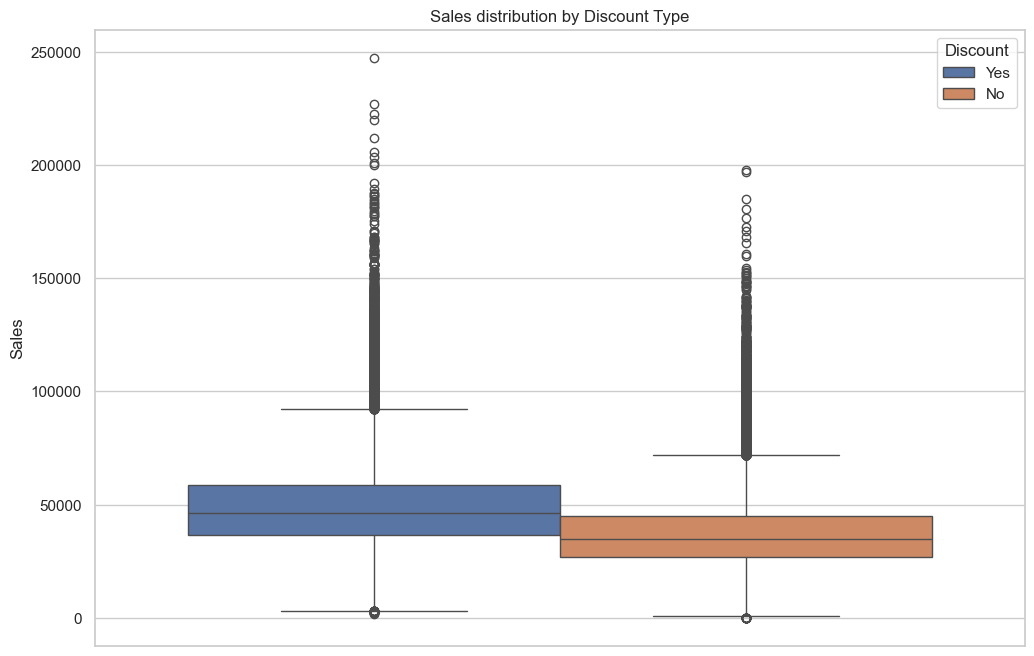

In [7]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Discount');
plt.title('Sales distribution by Discount Type');

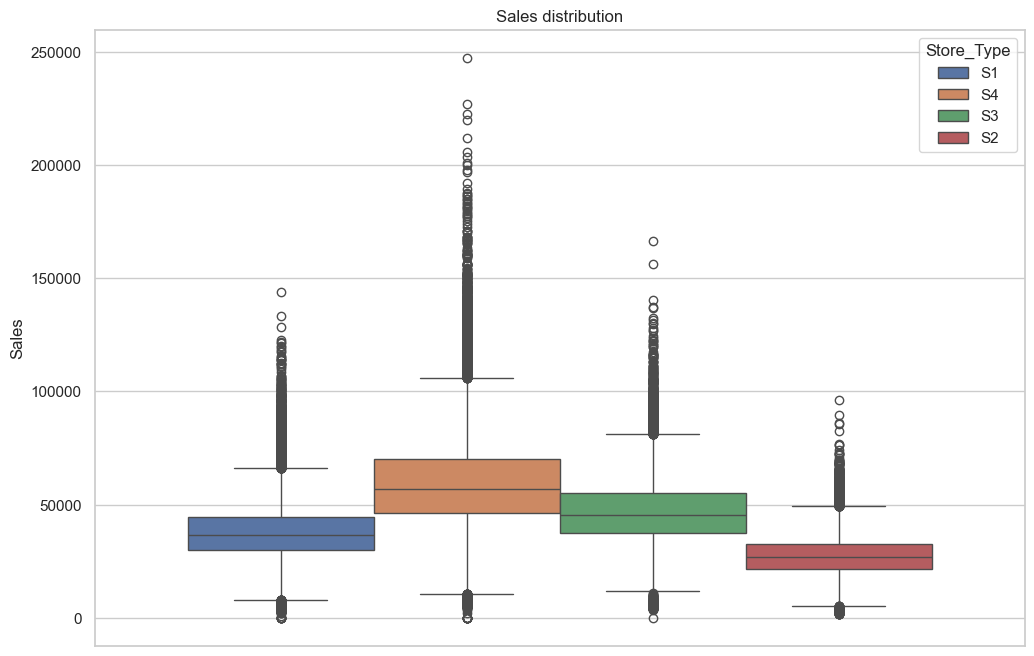

In [ ]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Store_Type');
plt.title('Sales distribution by Store Type');

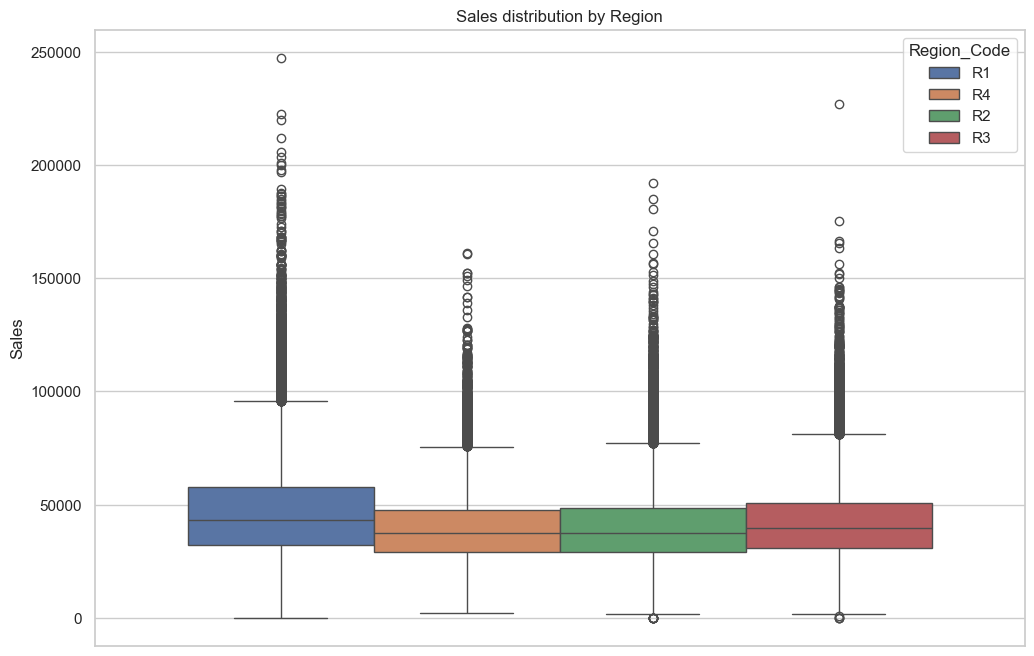

In [35]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Region_Code');
plt.title('Sales distribution by Region');

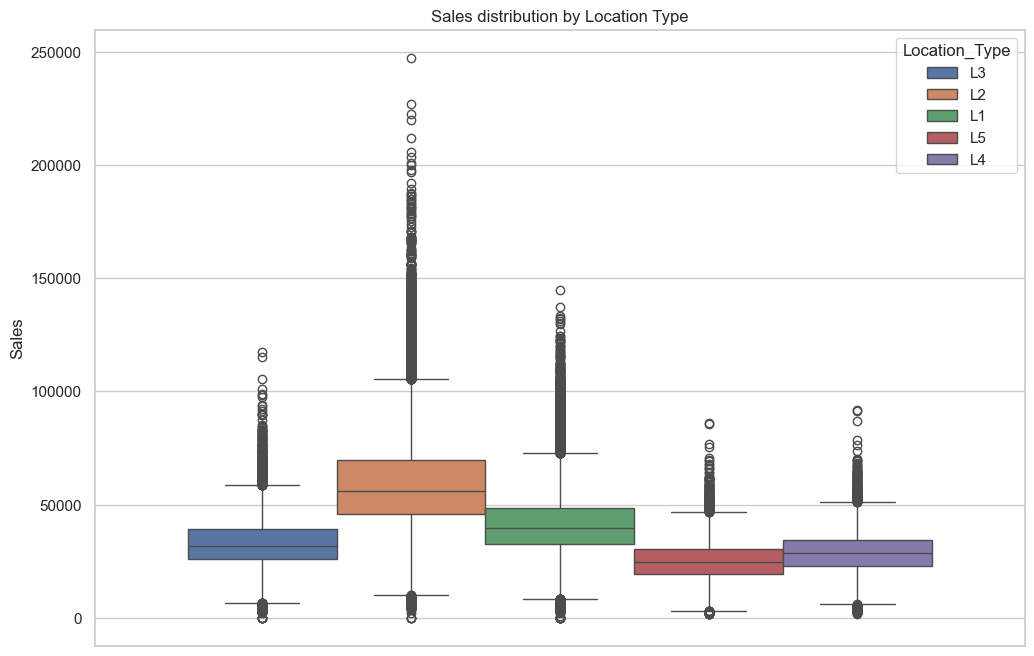

In [36]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Sales',  hue='Location_Type');
plt.title('Sales distribution by Location Type');

## Order Count

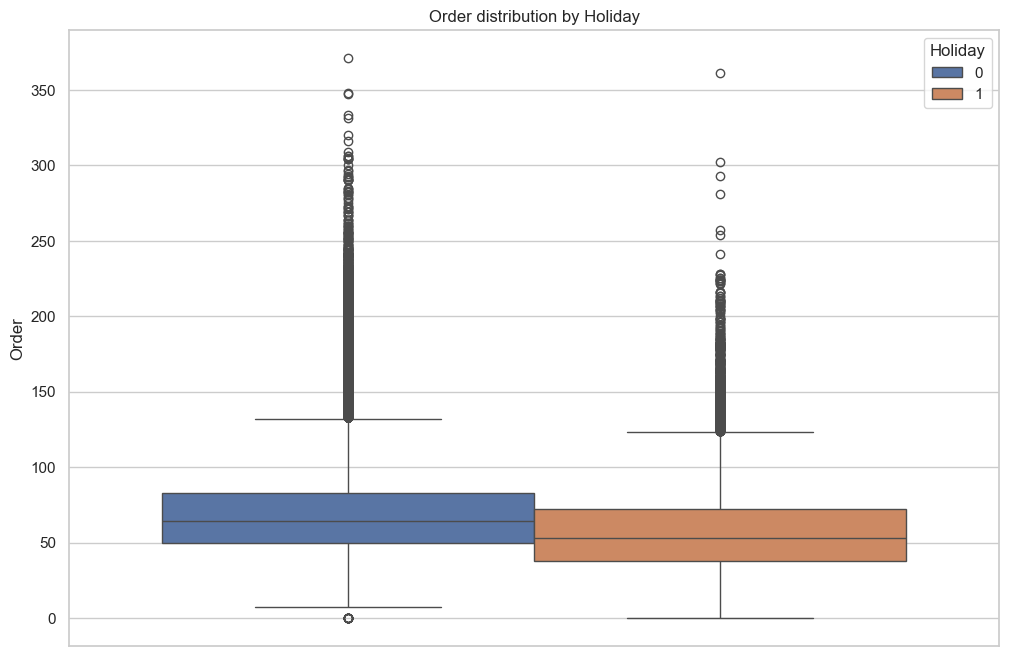

In [6]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Order',  hue='Holiday');
plt.title('Order distribution by Holiday');

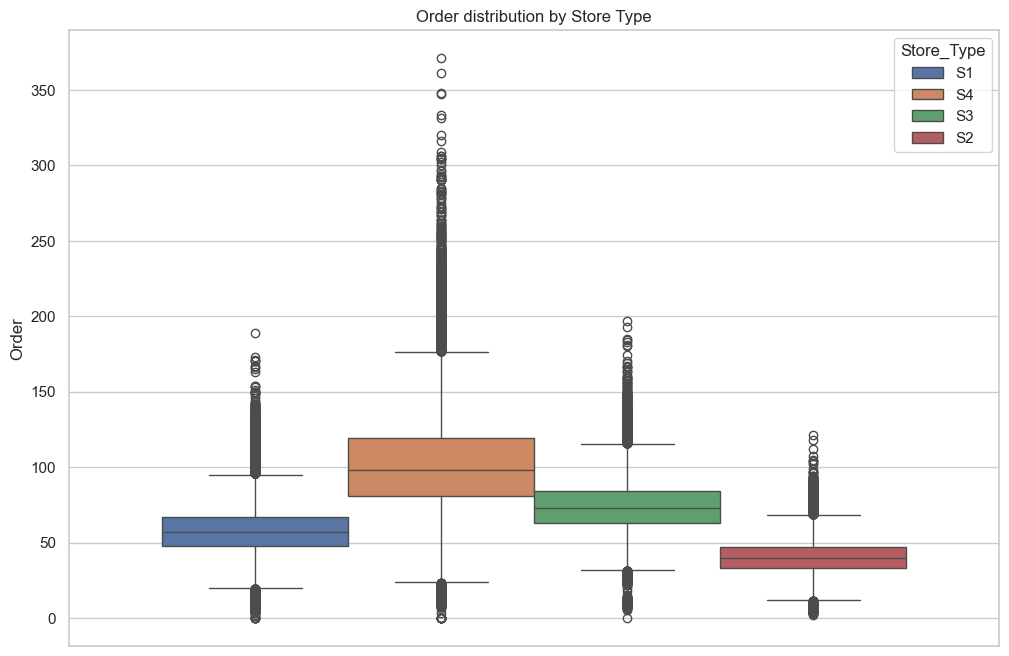

In [31]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Order',  hue='Store_Type');
plt.title('Order distribution by Store Type');

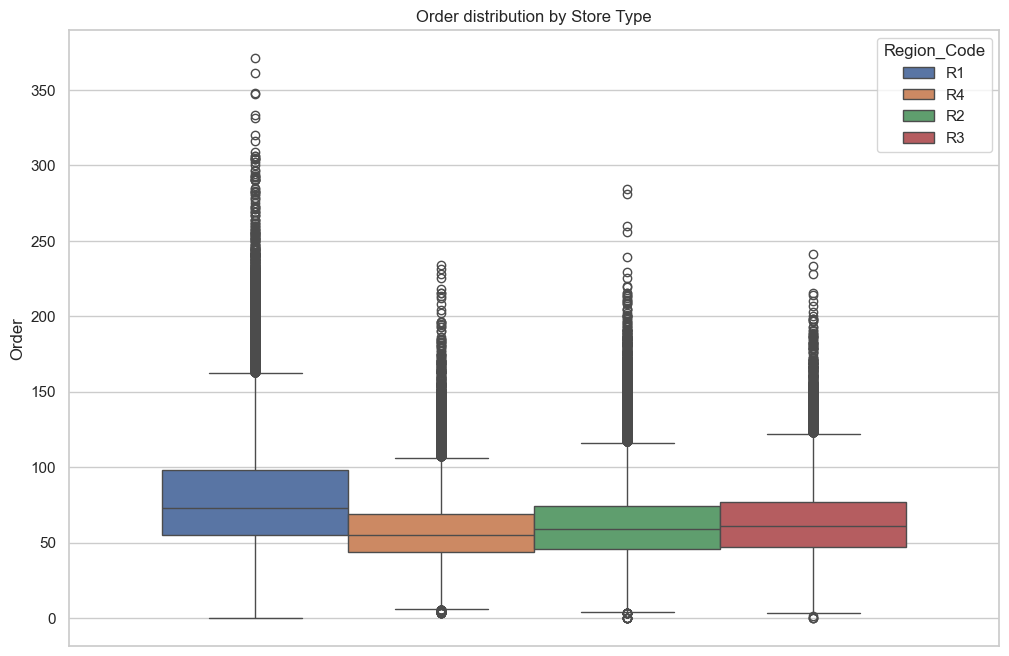

In [32]:
plt.figure(figsize=(12, 8))
sns.boxplot(data=df, y='Order',  hue='Region_Code');
plt.title('Order distribution by Store Type');

In [31]:
df

,ID,Store_id,Store_Type,Location_Type,Region_Code,Date,Holiday,Discount,Order,Sales
0,T1000001,1,S1,L3,R1,2018-01-01,1,Yes,9,7011.84
1,T1000002,253,S4,L2,R1,2018-01-01,1,Yes,60,51789.12
2,T1000003,252,S3,L2,R1,2018-01-01,1,Yes,42,36868.20
3,T1000004,251,S2,L3,R1,2018-01-01,1,Yes,23,19715.16
4,T1000005,250,S2,L3,R4,2018-01-01,1,Yes,62,45614.52
...,...,...,...,...,...,...,...,...,...,...
188335,T1188336,149,S2,L3,R2,2019-05-31,1,Yes,51,37272.00
188336,T1188337,153,S4,L2,R1,2019-05-31,1,No,90,54572.64
188337,T1188338,154,S1,L3,R2,2019-05-31,1,No,56,31624.56
188338,T1188339,155,S3,L1,R2,2019-05-31,1,Yes,70,49162.41


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 188340 entries, 0 to 188339
Data columns (total 12 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   ID               188340 non-null  object        
 1   Store_id         188340 non-null  int64         
 2   Store_Type       188340 non-null  object        
 3   Location_Type    188340 non-null  object        
 4   Region_Code      188340 non-null  object        
 5   Date             188340 non-null  datetime64[ns]
 6   Holiday          188340 non-null  int64         
 7   Discount         188340 non-null  object        
 8   Order            188340 non-null  int64         
 9   Sales            188340 non-null  float64       
 10  Region_Discount  188340 non-null  object        
 11  Region_Holiday   188340 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(3), object(7)
memory usage: 17.2+ MB


In [15]:
df.columns

Index(['ID', 'Store_id', 'Store_Type', 'Location_Type', 'Region_Code', 'Date',
       'Holiday', 'Discount', 'Order', 'Sales', 'Region_Discount',
       'Region_Holiday'],
      dtype='object')

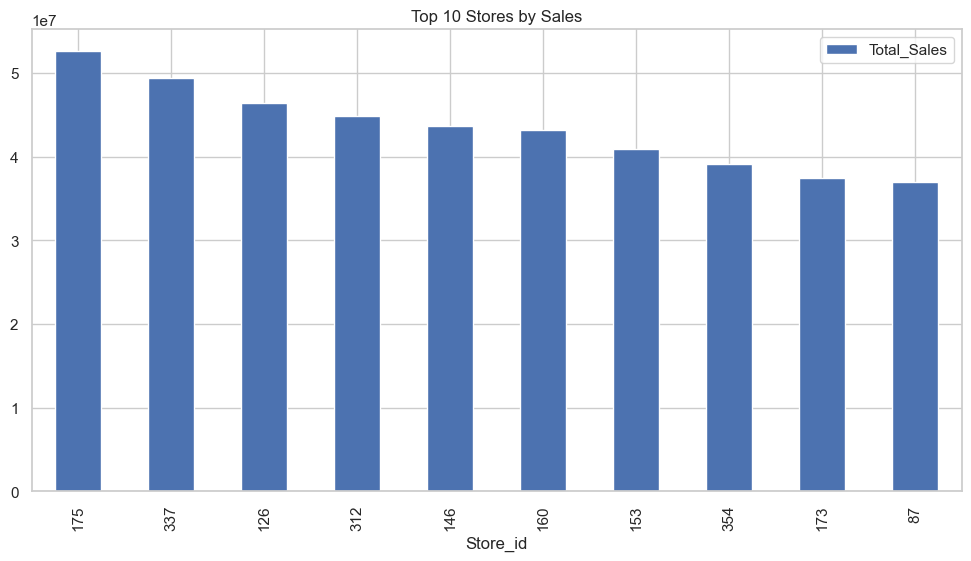

In [20]:
db.sql("""
    select Store_id, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Store_id order by Total_Sales desc limit 10
""").df().plot(kind='bar', x='Store_id', y='Total_Sales', figsize=(12, 6), title='Top 10 Stores by Sales');

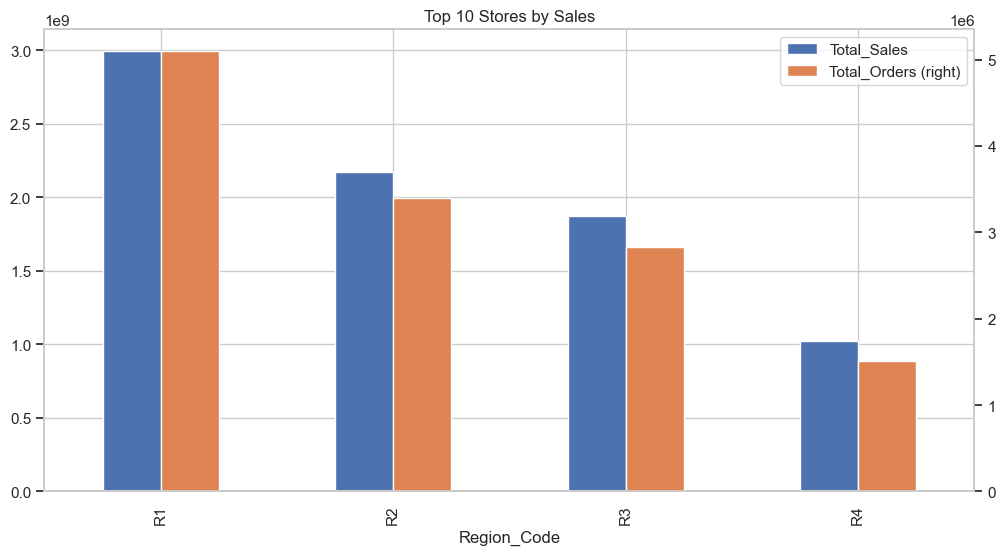

In [ ]:
db.sql("""
    select Region_Code, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Region_Code order by Total_Sales desc
""").df().plot(kind='bar', x='Region_Code', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Regions', secondary_y='Total_Orders');

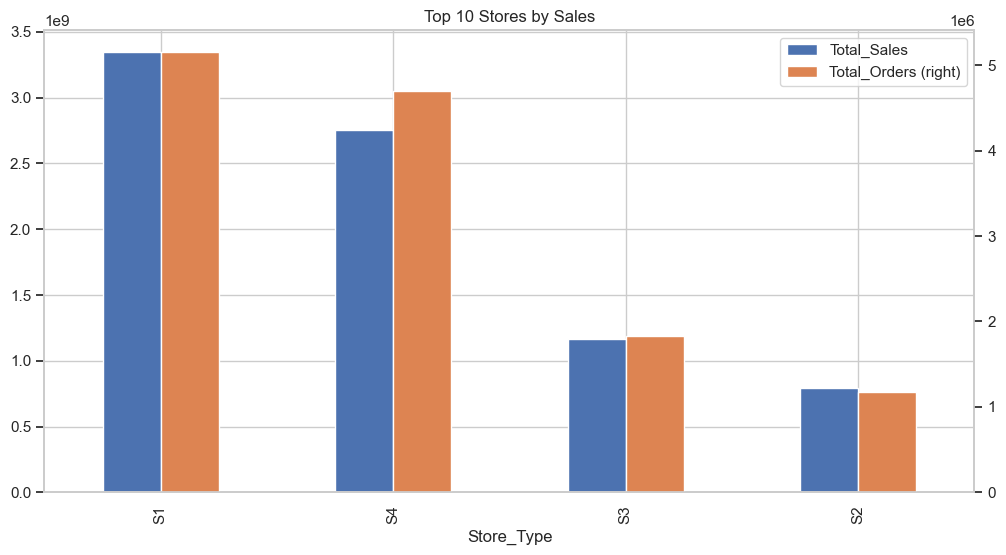

In [ ]:
db.sql("""
    select Store_Type, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Store_Type order by Total_Sales desc
""").df().plot(kind='bar', x='Store_Type', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Store Types', secondary_y='Total_Orders');

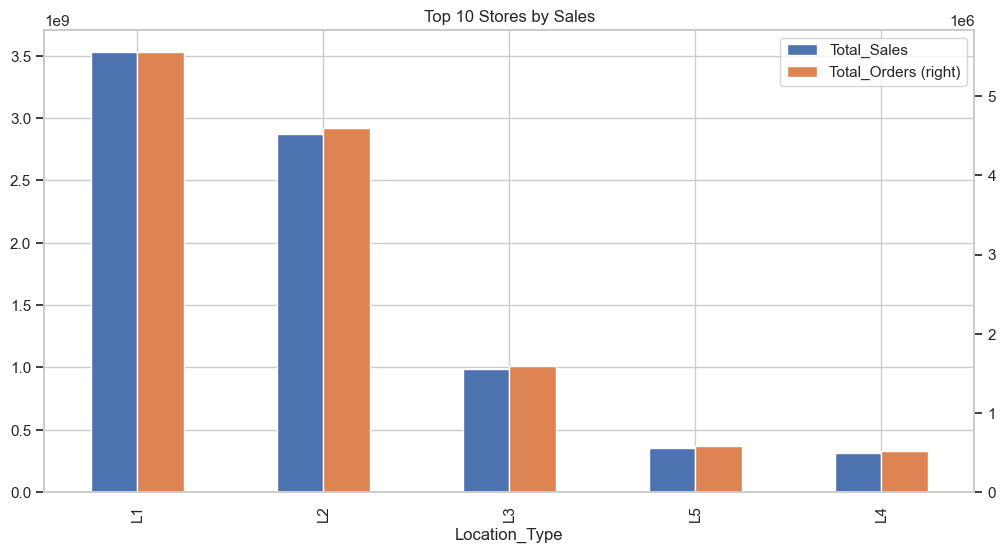

In [ ]:
db.sql("""
    select Location_Type, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Location_Type order by Total_Sales desc
""").df().plot(kind='bar', x='Location_Type', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Top Location', secondary_y='Total_Orders');

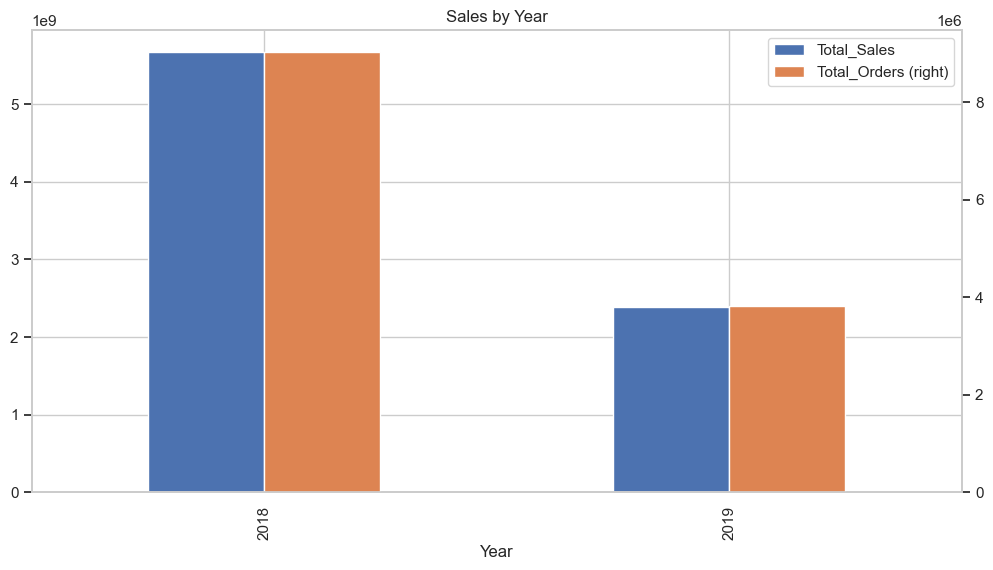

In [37]:
db.sql("""
    select Year, round(sum(Sales),0) as Total_Sales, sum("Order") as Total_Orders from df group by Year order by Year
""").df().plot(kind='bar', x='Year', y=['Total_Sales', 'Total_Orders'], figsize=(12, 6), title='Sales by Year', secondary_y='Total_Orders');